# Hands on Machine Learning

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://atenea.upc.edu/course/view.php?id=71605" target="_blank">
      <img src="https://github.com/dmaluenda/deeplearning_course/raw/master/resources/upc_logo_49px.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/dmaluenda/deeplearning_course/blob/master/03_CNN_Autoencoder.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/deeplearning_course/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/dmaluenda/deeplearning_course/blob/master/03_CNN_Autoencoder.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/deeplearning_course/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/dmaluenda/deeplearning_course/master/03_CNN_Autoencoder.ipynb"  target="_blank"
          download="03_CNN_Autoencoder">
      <img src="https://raw.githubusercontent.com/dmaluenda/deeplearning_course/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# $\text{III}$. Convolutional Neural Networks and Autoencoders (using Keras)

Hands on "Machine Learning on Classical and Quantum data" course of
[Master in Photonics - PHOTONICS BCN](https://photonics.masters.upc.edu/en/general-information)
[[UPC](https://photonics.masters.upc.edu/en) +
[UB](https://www.ub.edu/web/ub/en/estudis/oferta_formativa/master_universitari/fitxa/P/M0D0H/index.html?) +
[UAB](https://www.uab.cat/en/uab-official-masters-degrees-study-guides/) +
[ICFO](https://www.icfo.eu/lang/studies/master-studies)].

Tutorial 3

This notebook shows how to:
- implement a neural network using the Keras module
- recognize images with dense nets (supervised learning)
- recognize images with convolutional nets (supervised learning)
- implement image denoising using pseudo-encoders (almost unsupervised learning)
- generate images (U-net, GAN, cGAN and VAE)
- implement anomaly detection with an Autoencoder (1D)

**References**:

[1] [Machine Learning for Physicists](https://machine-learning-for-physicists.org/) by Florian Marquardt.<br>
[2] [Keras](https://keras.io/getting_started/): a deep learning API written in Python.<br>
[3] [Tensorflow](https://www.tensorflow.org/api_docs/python/tf): an open source machine learning platform.<br>
[4] [MNIST handwritten numbers](http://yann.lecun.com/exdb/mnist/).<br>
[5] [pix2pix](https://www.tensorflow.org/tutorials/generative/pix2pix): Image-to-image translation with a conditional GAN.<br>
[6] VAE example on [Towards data science](https://towardsdatascience.com/variational-autoencoders-as-generative-models-with-keras-e0c79415a7eb).<br>
[7] https://github.com/kartikgill/Autoencoders.<br>
[8] https://github.com/dhanushkamath/VariationalAutoencoder. <br>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports:-numpy-and-matplotlib-and-keras" data-toc-modified-id="Imports:-numpy-and-matplotlib-and-keras-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Imports: numpy and matplotlib and keras</a></span></li><li><span><a href="#Image-recognition-(Introduction-to-Keras)" data-toc-modified-id="Image-recognition-(Introduction-to-Keras)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image recognition (Introduction to Keras)</a></span><ul class="toc-item"><li><span><a href="#Test-out-things" data-toc-modified-id="Test-out-things-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Test out things</a></span></li></ul></li><li><span><a href="#Try-to-recognize-the-NIST-numbers-wit-a-CNN" data-toc-modified-id="Try-to-recognize-the-NIST-numbers-wit-a-CNN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Try to recognize the NIST numbers wit a CNN</a></span></li><li><span><a href="#Image-Denoiser-(almost-unsupervised-learning)" data-toc-modified-id="Image-Denoiser-(almost-unsupervised-learning)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Image Denoiser (almost unsupervised learning)</a></span></li><li><span><a href="#Generative-Adversial-Neural-Networks-(pix2pix)" data-toc-modified-id="Generative-Adversial-Neural-Networks-(pix2pix)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generative Adversial Neural Networks (pix2pix)</a></span></li><li><span><a href="#Autoencoder-for-dimension-reduction" data-toc-modified-id="Autoencoder-for-dimension-reduction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Autoencoder for dimension reduction</a></span></li><li><span><a href="#Autoencoders-(unsupervised-training)" data-toc-modified-id="Autoencoders-(unsupervised-training)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Autoencoders (unsupervised training)</a></span></li><li><span><a href="#Autoencoder-to-anomaly-detect" data-toc-modified-id="Autoencoder-to-anomaly-detect-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Autoencoder to anomaly detect</a></span></li><li><span><a href="#Autoencoders-(Functions)" data-toc-modified-id="Autoencoders-(Functions)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Autoencoders (Functions)</a></span></li><li><span><a href="#Example-1:-Reproducing-randomly-placed-circles" data-toc-modified-id="Example-1:-Reproducing-randomly-placed-circles-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Example 1: Reproducing randomly placed circles</a></span></li><li><span><a href="#Example-2:-Reproducing-randomly-placed-circles-with-a-true-autoencoder" data-toc-modified-id="Example-2:-Reproducing-randomly-placed-circles-with-a-true-autoencoder-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Example 2: Reproducing randomly placed circles with a true autoencoder</a></span></li></ul></div>

## Imports: numpy and matplotlib and keras

In [12]:
# keras: Sequential is the neural-network class, Dense is
# the standard network layer
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Input  # Let's see how to use it
from tensorflow.keras.layers import Dense, GaussianDropout  # Fully connected
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D  # for CNN
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape  # For Autoencoders
from tensorflow.keras import optimizers # to choose more advanced optimizers like 'adam'
from tensorflow.keras.datasets import mnist  # dataset of handwritten numbers

import numpy as np
import random

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

# for subplots within subplots:
from matplotlib import gridspec

# for nice inset colorbars: (approach changed from lecture 1 'Visualization' notebook)
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

# for updating display 
# (very simple animation)
from IPython.display import clear_output
from time import time, sleep

# Set up a random number generator with a fixed seed, so that
# running this whole notebook repeatedly should always give
# the same result (useful for debugging)
rng = np.random.RandomState(23455)

## Image recognition (Introduction to Keras)

The loader for the MNIST image data was taken from Nielsen's online book,

http://neuralnetworksanddeeplearning.com/chap1.html

See specifically the following link, for downloading the MNIST image data (we only need the mnist.pkl.gz package inside the 'data' subdirectory; store it inside the present directory of the notebook):
https://github.com/mnielsen/neural-networks-and-deep-learning/archive/master.zip


In [2]:
"""
mnist_loader
~~~~~~~~~~~~

taken from Nielsen's online book:
http://neuralnetworksanddeeplearning.com/chap1.html


A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

def load_images():
    (train_val_X, train_val_y), (test_X, test_y) = mnist.load_data()

    # to convert values from 0 to 255 into range 0 to 1.
    train_val_X = train_val_X.astype('float32') / 255.
    test_X = test_X.astype('float32') / 255.
    
    # adapt this if using `channels_first` image data format
    train_val_X = np.reshape(train_val_X, (len(train_val_X), 28, 28, 1)) 
    test_X = np.reshape(test_X, (len(test_X), 28, 28, 1))
    
    train_X = train_val_X[:-10000]
    val_X = train_val_X[-10000:]

    train_y = train_val_y[:-10000]
    val_y = train_val_y[-10000:]
    
    return (train_X, train_y), (val_X, val_y), (test_X, test_y)


def flatten(dataset):
    new_dataset = np.zeros([dataset.shape[0], dataset.shape[1]*dataset.shape[2]])

    for idx, item in enumerate(dataset):
        new_dataset[idx, :] = dataset[idx].flatten()
    
    return new_dataset


def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    
    tr_imgs, vl_imgs, te_imgs = load_images()
    
    training_data = (flatten(tr_imgs[0]), tr_imgs[1])
    validation_data = (flatten(vl_imgs[0]), vl_imgs[1])
    test_data = (flatten(te_imgs[0]), te_imgs[1])
    
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.a

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    
    global training_inputs, training_results
    global validation_inputs, validation_results
    global test_inputs, test_results
    global num_samples, numpixels, num_test_samples
    
    tr_d, va_d, te_d = load_data()
    
    numpixels = tr_d[0].shape[1]
    
    num_samples=len(tr_d[0])
    training_inputs=np.zeros([num_samples,numpixels])
    training_results=np.zeros([num_samples,10])    
    for j in range(num_samples):
        training_inputs[j,:] = np.reshape(tr_d[0][j], (numpixels))
        training_results[j,:] = vectorized_result(tr_d[1][j])
#    validation_inputs = [reshape(x, (numpixels)) for x in va_d[0]]
#    validation_results = [vectorized_result(y) for y in va_d[1]]

    num_test_samples=len(te_d[0])
    test_inputs=np.zeros([num_test_samples,numpixels])
    test_results=np.zeros([num_test_samples,10])    
    for j in range(num_test_samples):
        test_inputs[j,:] = np.reshape(te_d[0][j], (numpixels))
        test_results[j,:] = vectorized_result(te_d[1][j])

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10))
    e[j] = 1.0
    return e

In [ ]:
# initialize the network
def init_net():
    global net, numpixels
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Dense(30, input_shape=(numpixels,), activation='relu'))
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.SGD(learning_rate=1.0), 
                metrics=['categorical_accuracy'])

In [ ]:
# initialize the network
def init_net_large():
    global net, numpixels
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Dense(100, input_shape=(numpixels,), activation='relu'))
    net.add(GaussianDropout(0.1))
    net.add(Dense(50, activation='relu'))
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.SGD(learning_rate=1.0), 
                metrics=['categorical_accuracy'])

In [ ]:
def test_on(start,stop,dontprint=False, is_cnn=False):
    global test_inputs, test_results
    global net, predictions_probs, predictions, true_labels
    
    if is_cnn:
        inputs = np.reshape(test_inputs[start:stop,:], [stop-start, 28, 28])
    else:
        inputs = test_inputs[start:stop,:]
        
    
    predictions_probs=net.predict_on_batch(inputs)
    predictions=np.argmax(predictions_probs,axis=1)
    if dontprint==False:
        print("Predictions: ", predictions)
    true_labels=np.argmax(test_results[start:stop,:], axis=1)
    if dontprint==False:
        print("True labels: ", true_labels)

In [ ]:
def display_image(which):
    global test_inputs
    
    plt.imshow(np.reshape(test_inputs[which,:],[28,28]),interpolation='nearest', cmap='binary')
    plt.show()

In [ ]:
def display_image_array(which):
    global test_inputs
    
    numcolumns=8
    BigImage=np.zeros([28*numcolumns,28*numcolumns])
    for j in range(len(which)):
        x=(j%numcolumns)*28
        y=int(j/numcolumns)*28
        BigImage[x:x+28,y:y+28]=np.reshape(test_inputs[which[j],:],[28,28])
    plt.imshow(BigImage,interpolation='nearest', cmap='binary')
    plt.show()

In [ ]:
def display_mistakes(maxnum):
    global test_inputs, rest_results, num_test_samples
    global true_labels, predictions, predictions_probs
    
    test_on(0,num_test_samples,dontprint=True)
    which=np.where(true_labels!=predictions)[0]
    for j in which:
        if j<maxnum:
            display_image(j)
            print("True ", true_labels[j], " - Predicted ", predictions[j], " with prob. ", predictions_probs[j,predictions[j]])
        

### Test out things

In [ ]:
load_data_wrapper() # load all the MNIST images

In [ ]:
training_inputs.shape

In [ ]:
psi=training_inputs-np.sum(training_inputs,axis=0)/num_samples

In [ ]:
plt.imshow(np.reshape(psi[4,:],[28,28]))

In [ ]:
psi.shape

In [ ]:
display_image_array(range(8*8))

In [ ]:
training_inputs.shape

In [ ]:
init_net_large()  # init_net()  # 
net.summary()

In [ ]:
batchsize=100
batches=int(num_samples/batchsize)-1
costs=np.zeros(batches)

t0 = time()
for j in range(batches):
    costs[j]=net.train_on_batch(training_inputs[j*batchsize:(j+1)*batchsize,:], 
                                training_results[j*batchsize:(j+1)*batchsize,:])[0]
t_done = time() - t0

print("Elapsed time: %.2f s (%.4f s/step)" % (t_done, t_done/batches))
plt.plot(costs,linewidth=3)
plt.show()

In [ ]:
test_on(0,20)
# see which fraction of the test samples is classified incorrectly
test_on(0,num_test_samples,dontprint=True)
which=np.where(true_labels!=predictions)[0]
print("Wrong predictions: ", len(which)/num_test_samples*100, "%")

In [ ]:
# use the keras "fit" function to go through the whole data set many times ('epochs'), 
# and even set aside some validation samples
epochs = 30
t0 = time()
history=net.fit(training_inputs,training_results,batch_size=100,
                epochs=epochs,validation_split=0.1)
t_done = time() - t0

print("Elapsed time: %.2f s (%.4f s/epoch)" % (t_done, t_done/epochs))

In [ ]:
# see which fraction of the test samples is classified incorrectly
test_on(0,num_test_samples,dontprint=True)
which=np.where(true_labels!=predictions)[0]
print("Wrong predictions: ", len(which)/num_test_samples*100, "%")

In [ ]:
fig=plt.figure()
plt.plot(history.history['categorical_accuracy'], linewidth=3)
plt.plot(history.history['val_categorical_accuracy'], linewidth=3)
plt.show()
#fig.savefig("Handwritten_MNIST_Fig1_Accuracy.pdf")
#fig.savefig("Handwritten_MNIST_Fig2_AccuracyAndValidation.pdf")
#fig.savefig("Handwritten_MNIST_Fig4_100_50_DropOut_AccuracyAndValidation.pdf")

In [ ]:
display_mistakes(100)

## Try to recognize the MNIST numbers wit a CNN

In [ ]:
# initialize the network
def cnn_simplest_net(M):
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Conv2D(input_shape=(M,M,1), filters=7, kernel_size=[5,5],
                   activation='relu', padding='same'))
    net.add(AveragePooling2D(pool_size=4))
    net.add(Flatten())
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.SGD(learning_rate=1.0), 
                metrics=['categorical_accuracy'])
    
    return net

In [ ]:
# initialize the network
def cnn_net(M):
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Conv2D(input_shape=(M,M,1), filters=8, kernel_size=[5,5],
                   activation='relu', padding='same'))
    net.add(AveragePooling2D(pool_size=2))
    net.add(Conv2D(input_shape=(M,M,1), filters=8, kernel_size=[5,5],
                   activation='relu', padding='same'))
    net.add(AveragePooling2D(pool_size=2))
    net.add(Flatten())
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.Adam(learning_rate=0.01), 
                metrics=['categorical_accuracy'])
    
    return net

In [ ]:
net = cnn_net(int(np.sqrt(numpixels)))  # cnn_simplest_net(int(np.sqrt(numpixels)))  # 
net.summary()

In [ ]:
train_data = np.reshape(training_inputs, [50000, 28, 28])

epochs = 3
t0 = time()
history=net.fit(train_data,training_results,batch_size=100,
                epochs=epochs,validation_split=0.1)
t_done = time() - t0

print("Elapsed time: %.2f s (%.4f s/epoch)" % (t_done, t_done/epochs))

In [ ]:
fig=plt.figure()
plt.plot(history.history['categorical_accuracy'], linewidth=3)
plt.plot(history.history['val_categorical_accuracy'], linewidth=3)
plt.show()
#fig.savefig("Handwritten_MNIST_Fig1_Accuracy.pdf")
#fig.savefig("Handwritten_MNIST_Fig2_AccuracyAndValidation.pdf")
#fig.savefig("Handwritten_MNIST_Fig4_100_50_DropOut_AccuracyAndValidation.pdf")

In [ ]:
# see which fraction of the test samples is classified incorrectly
test_on(0,num_test_samples,dontprint=True, is_cnn=True)
which=np.where(true_labels!=predictions)[0]
print("Wrong predictions: ", len(which)/num_test_samples*100, "%")

## Image Denoiser (almost unsupervised learning)

*Code based on [this Keras example](https://keras.io/examples/vision/autoencoder/)*.

In [ ]:
tr_imgs, vl_imgs, te_imgs = load_images()

train_X = tr_imgs[0]
val_X = vl_imgs[0]
test_X = te_imgs[0]

noise_factor = 0.5
#np.random.normal => random means to obtain random samples and normal means normal or gaussian distribution, i.e. random sample from gaussian distribution
train_X_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape)  
val_X_noisy = val_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=val_X.shape) 
test_X_noisy = test_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_X.shape) 

# to make values in the range of 0 to 1, if values < 0 then they will be equal to 0 and values > 1 then they will be equal to 1.
train_X_noisy = np.clip(train_X_noisy, 0., 1.)   
val_X_noisy = np.clip(val_X_noisy, 0., 1.)
test_X_noisy = np.clip(test_X_noisy, 0., 1.)

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_X[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_X_noisy[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
Input_img = Input(shape=(28, 28, 1))  


x1 = Conv2D(4, (3, 3), activation='relu', padding='same')(Input_img)
x1 = MaxPool2D( (2, 2), padding='same')(x1)
x2 = Conv2D(8, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2), padding='same')(x2)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
encoded    = MaxPool2D( (2, 2), padding='same')(x3)

# decoding architecture
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(8, (3, 3), activation='relu', padding='same')(x3)
x2 = UpSampling2D((2, 2))(x2)
x1 = Conv2D(4, (3, 3), activation='relu')(x2)
x1 = UpSampling2D((2, 2))(x1)
decoded   = Conv2D(1, (3, 3), padding='same')(x1)


autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

a_e = autoencoder.fit(train_X_noisy, train_X,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(test_X_noisy, test_X),
                callbacks=[early_stopper])

In [ ]:
# to predict the reconstructed images for the original images...
pred = autoencoder.predict(test_X_noisy)

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(test_X[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(test_X_noisy[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

# to visualize reconstructed images(output of autoencoder)
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(pred[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

## Generative Adversial Neural Networks (pix2pix)

Go to `003b_pix2pix.ipynb` notebook.

## Autoencoder for dimension reduction

Code based on [this example on *Towards data science*](https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html).

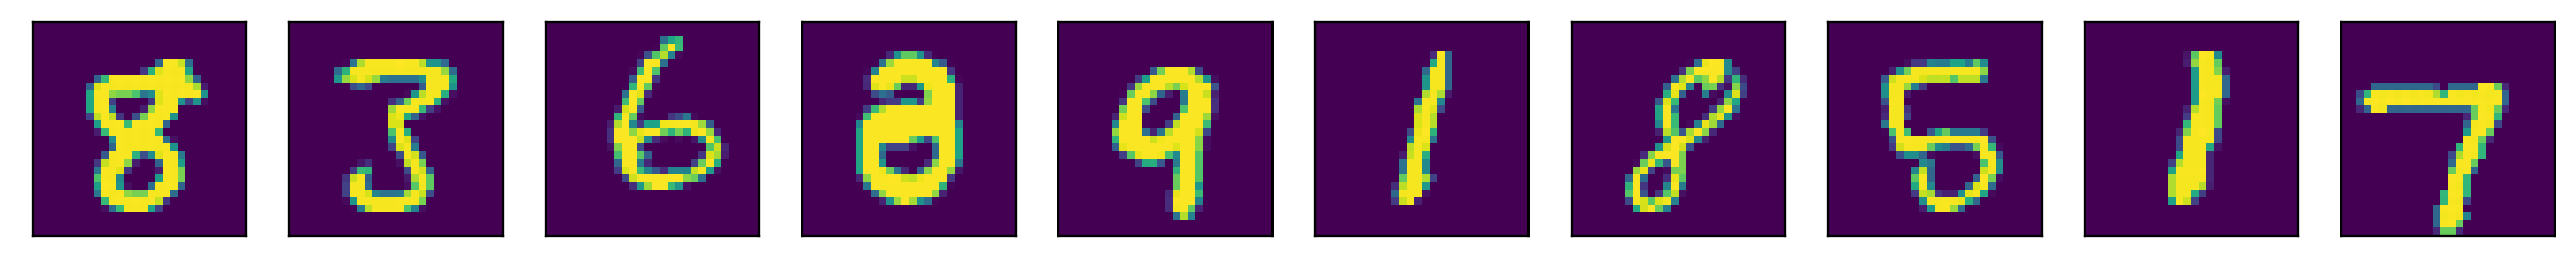

In [15]:
# Load the MNIST data set
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0., 1.]
# x_train = x_train / 255.
# x_test = x_test / 255.

tr_imgs, vl_imgs, te_imgs = load_images()

x_train = tr_imgs[0]
x_val = vl_imgs[0]
x_test = te_imgs[0]
y_test = te_imgs[1]

# Take a look at the dataset
n_samples = 10
idx = random.sample(range(x_train.shape[0]), n_samples)
plt.figure(figsize=(15,4))
for i in range(n_samples):
    plt.subplot(1, n_samples, i+1)
    plt.imshow(x_train[idx[i]].squeeze());
    plt.xticks([], [])
    plt.yticks([], [])

In [9]:
# This is the dimension of the latent space (encoding space)
latent_dim = 2

# Images are 28 by 28
img_shape = (x_train.shape[1], x_train.shape[2])

encoder = Sequential([
    Flatten(input_shape=img_shape),
    Dense(192, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(latent_dim, name='encoder_output')
])

decoder = Sequential([
    Dense(64, activation='sigmoid', input_shape=(latent_dim,)),
    Dense(128, activation='sigmoid'),
    Dense(img_shape[0] * img_shape[1], activation='relu'),
    Reshape(img_shape)
])

In [52]:
class TestEncoder(tf.keras.callbacks.Callback):
    def __init__(self, x_test, y_test, ax):
        super(TestEncoder, self).__init__()
        self.x_test = x_test
        self.y_test = y_test
        self.ax = ax
        self.current_epoch = 0

    def on_epoch_begin(self, epoch, logs={}):
        self.current_epoch = self.current_epoch + 1
        encoder_model = Model(inputs=self.model.input,
                              outputs=self.model.get_layer('encoder_output').output)
        encoder_output = encoder_model(self.x_test)
        plt.subplot(4, 3, self.current_epoch)
        plt.scatter(encoder_output[:, 0],
                    encoder_output[:, 1], s=20, alpha=0.8,
                    cmap='Set1', c=self.y_test[0:x_test.shape[0]])
        plt.xlim(-9, 9)
        plt.ylim(-9, 9)
        plt.xlabel('Latent Dimension 1')
        plt.ylabel('Latent Dimension 2')

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

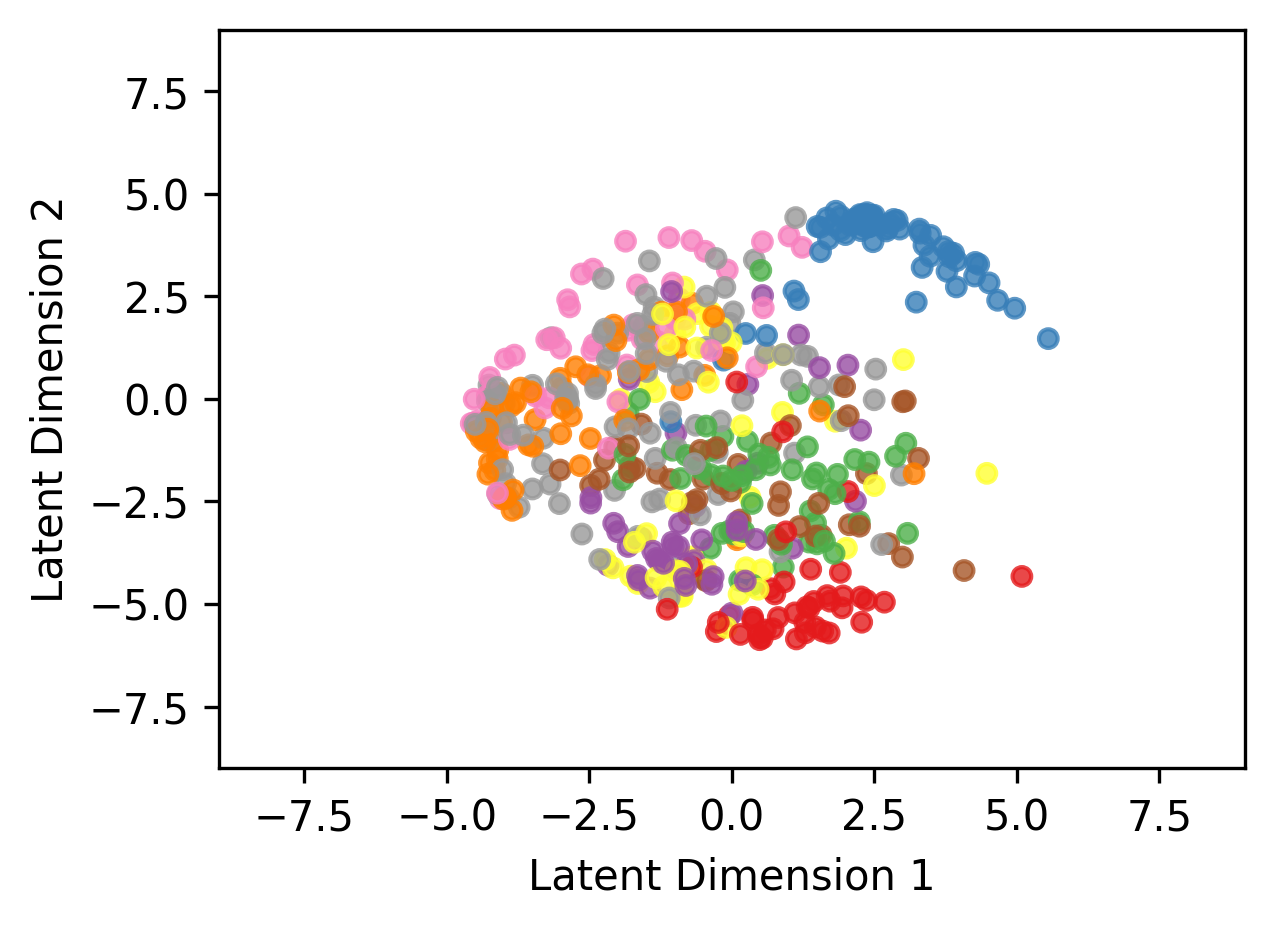

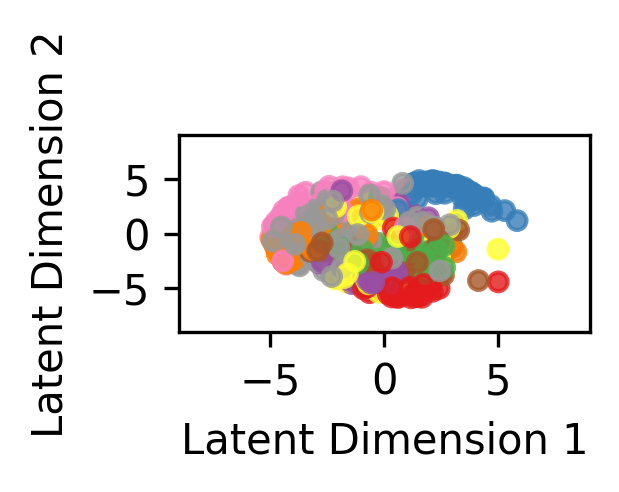

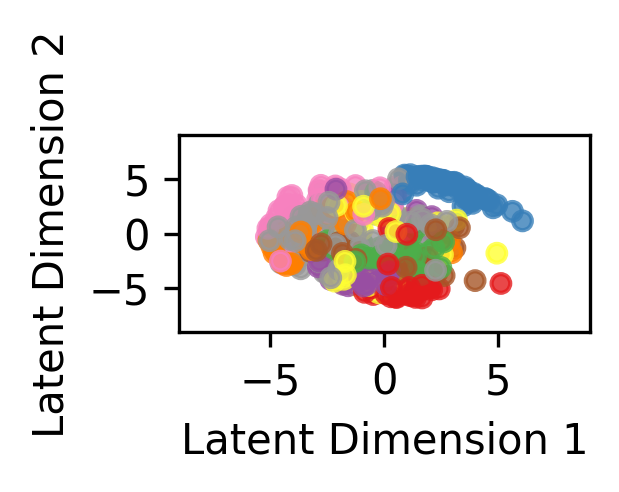

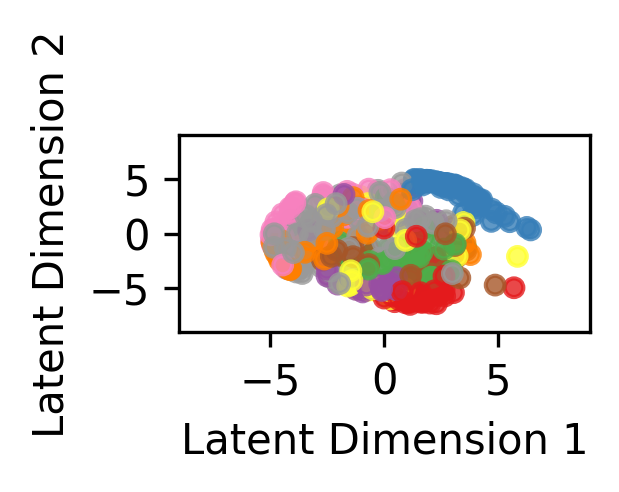

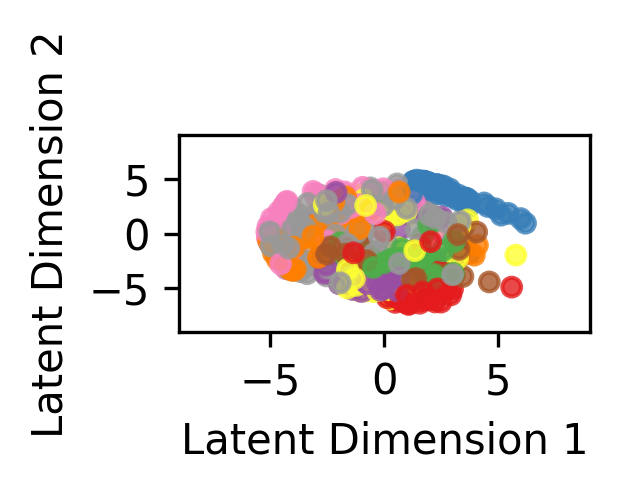

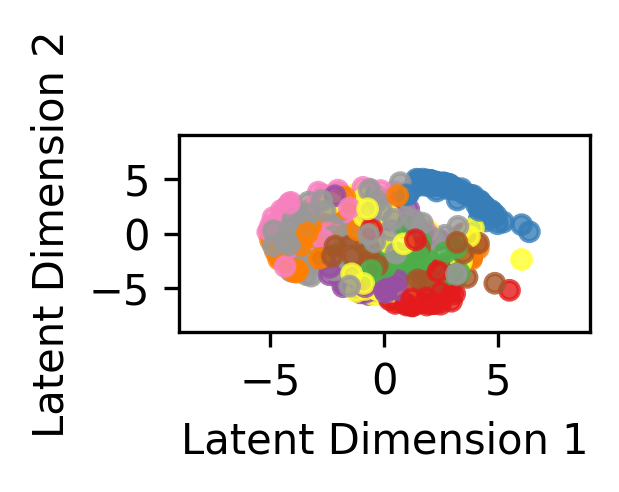

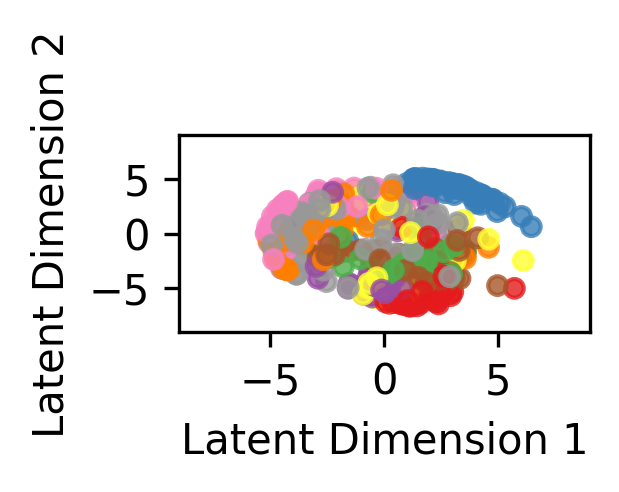

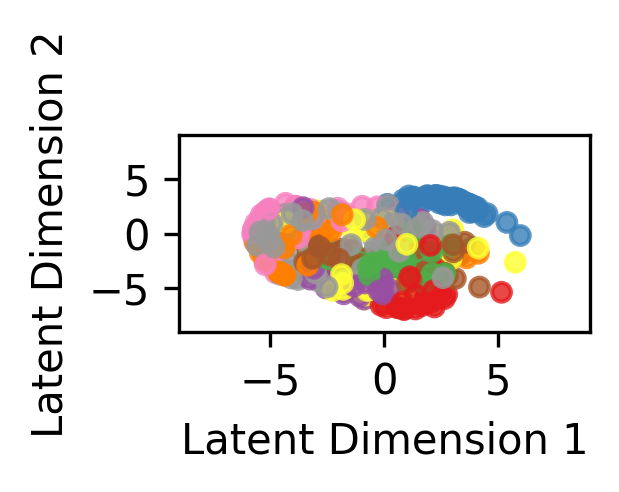

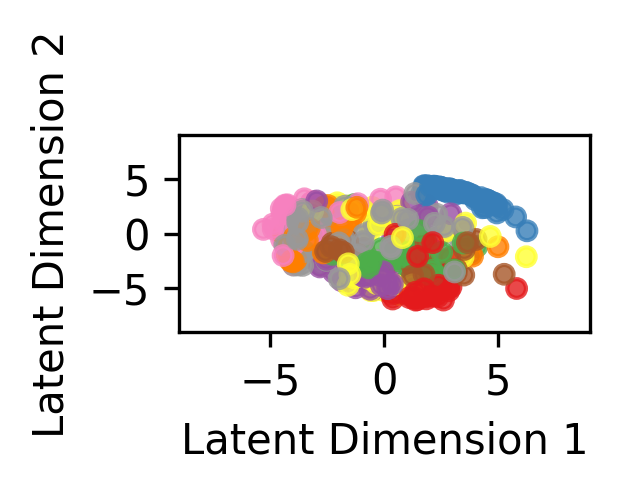

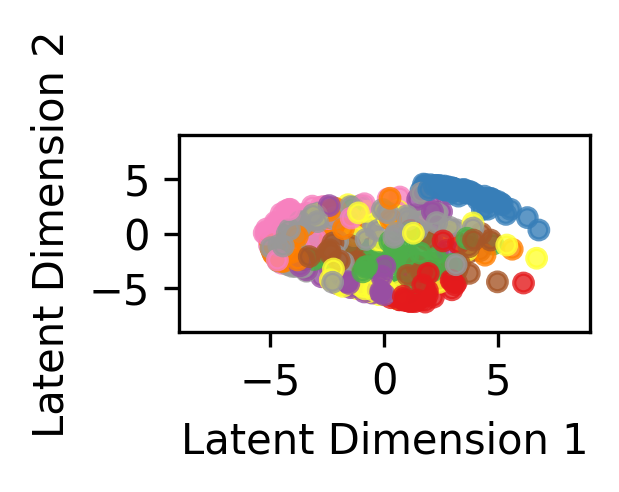

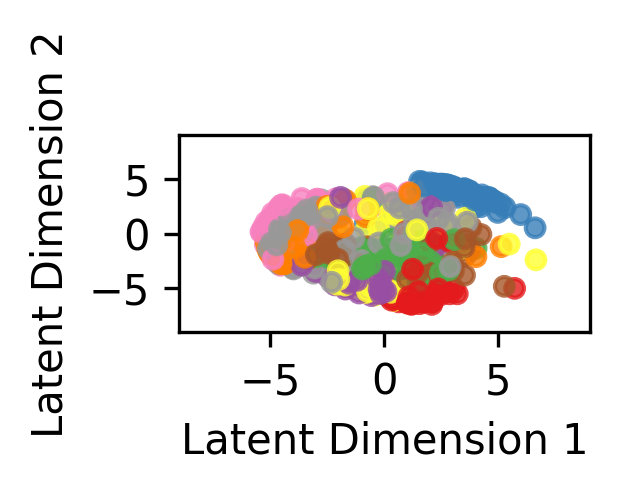

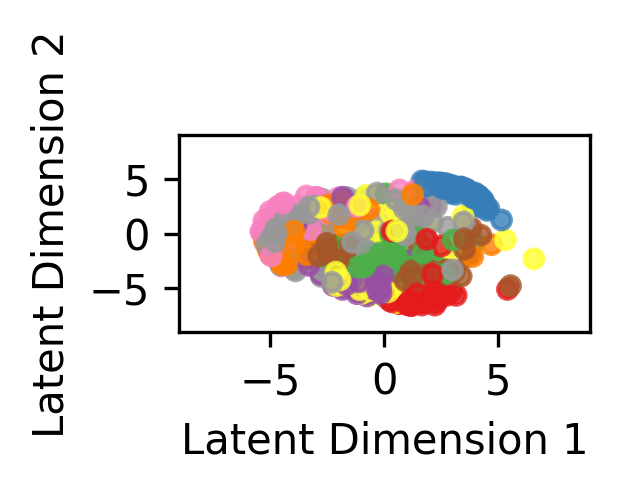

In [53]:
plt.figure(figsize=(15,15))
model_history = autoencoder.fit(x_train, x_train, epochs=12, batch_size=32, verbose=0,
                                callbacks=[TestEncoder(x_test[0:500], y_test[0:500])])


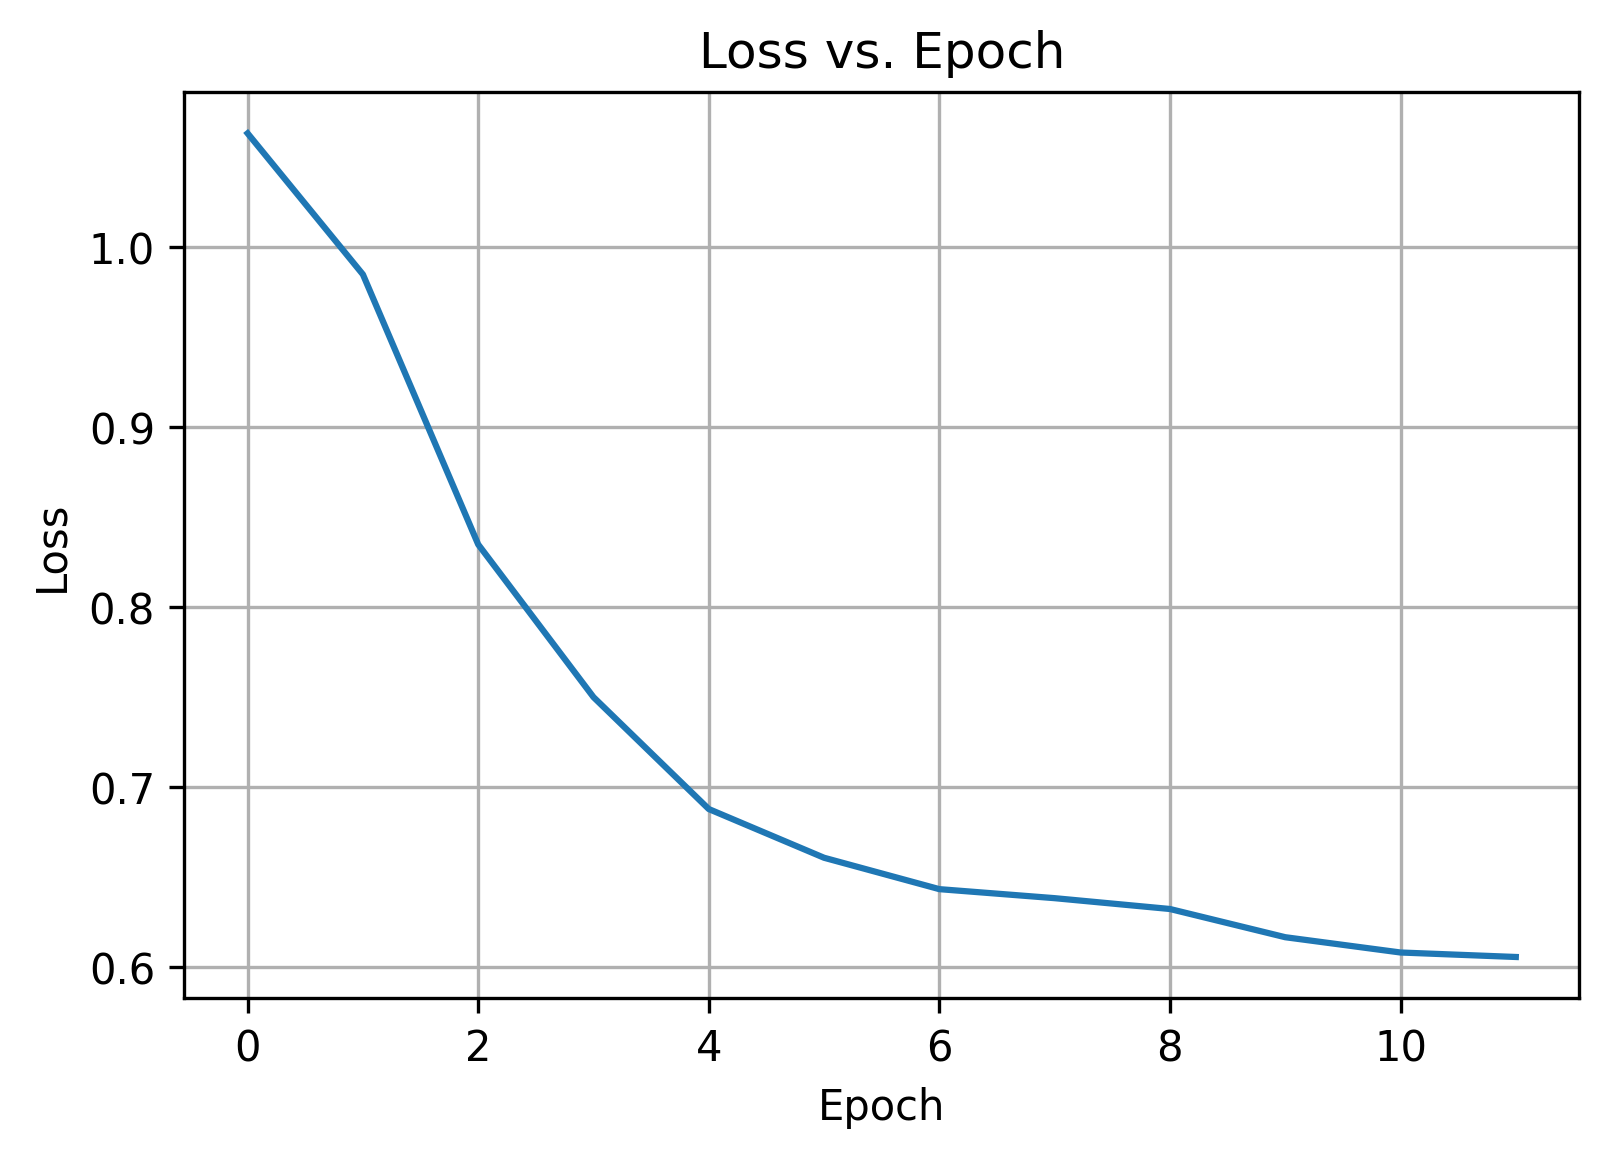

In [17]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)


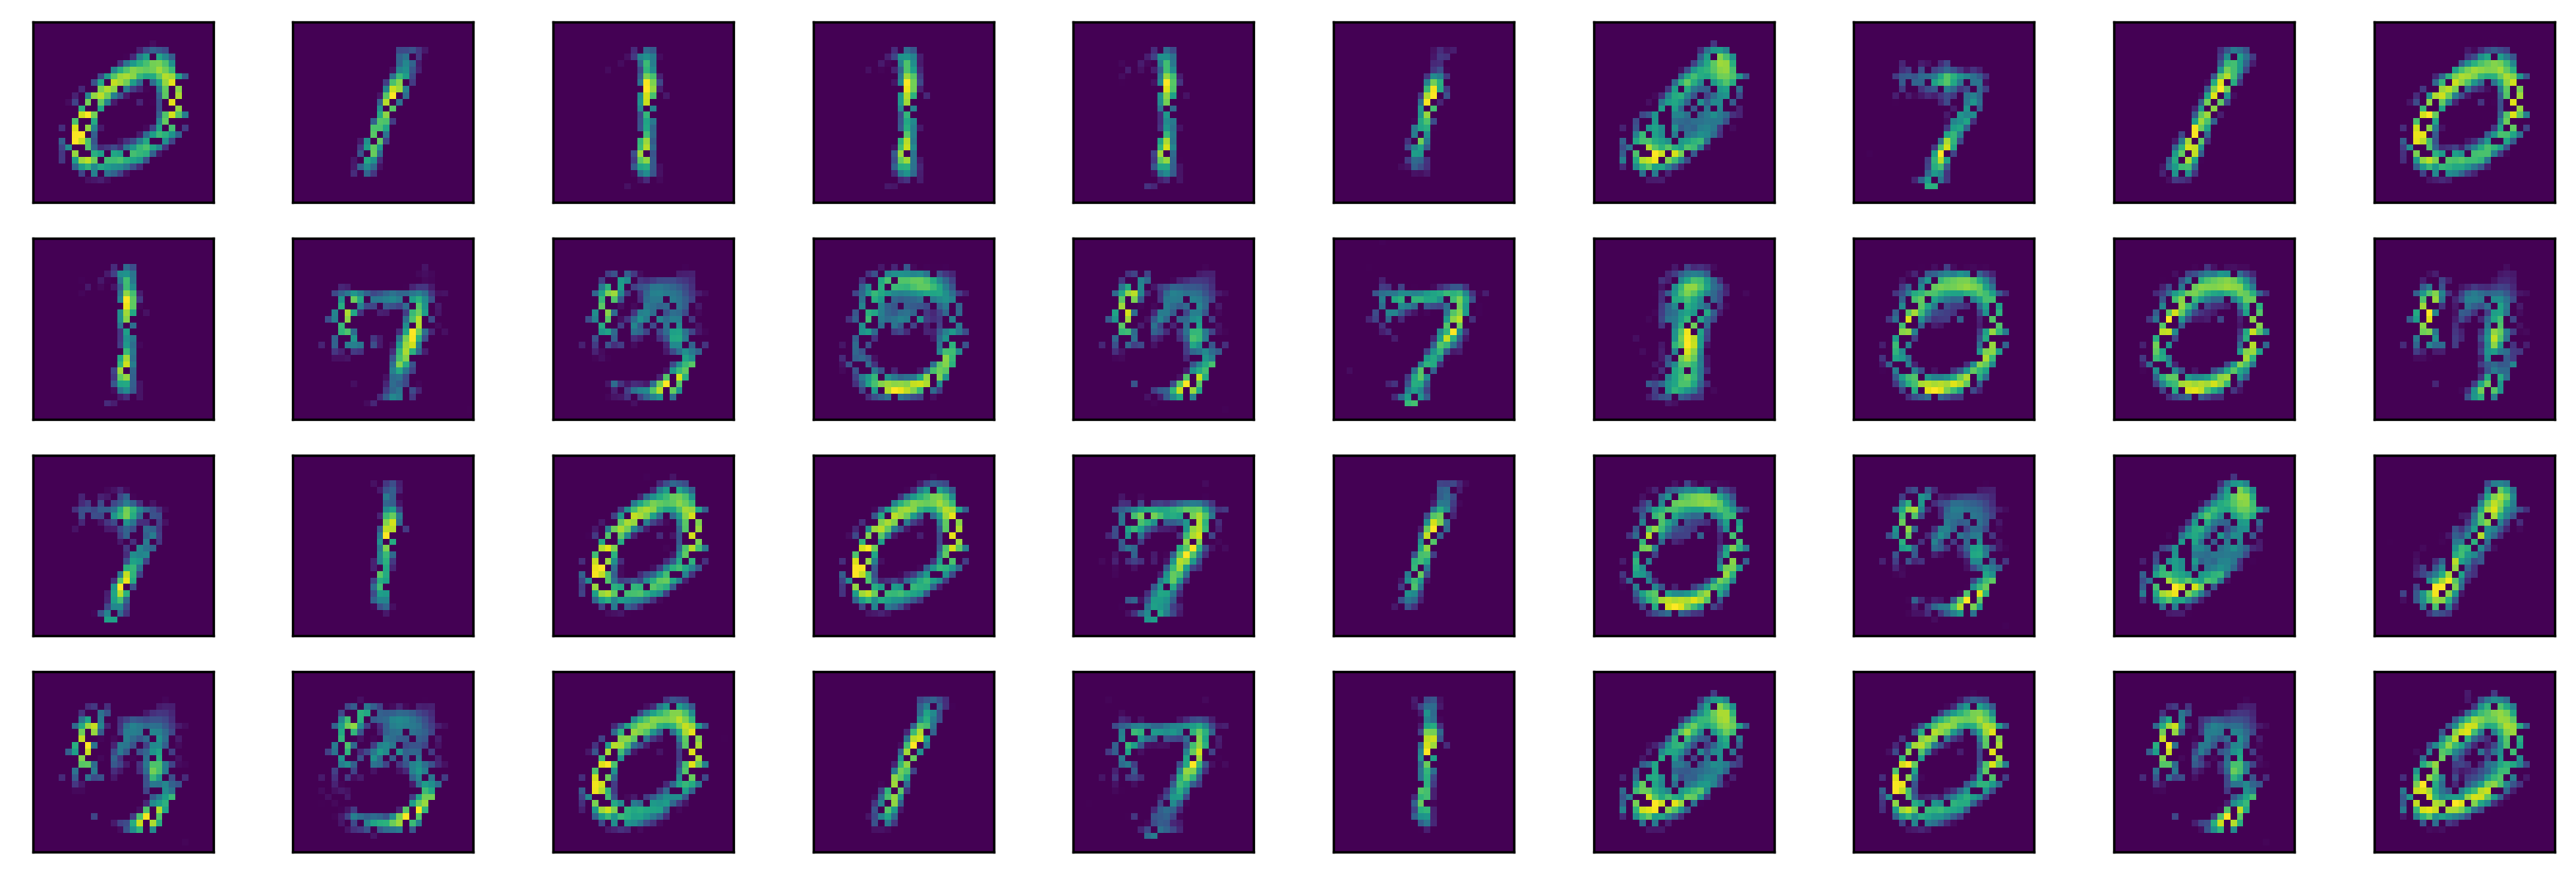

In [32]:
n_samples = 40
fake_sample = np.random.uniform(low=-20, high=20, size=(n_samples, 2))
plt.figure(figsize=(15,5))
for i in range(n_samples):
    plt.subplot(4, n_samples//4, i+1)
    fake_encoding = np.array([fake_sample[i]])
    fake_digit = decoder(fake_encoding).numpy().squeeze() 
    plt.imshow(fake_digit);
    plt.xticks([], [])
    plt.yticks([], [])

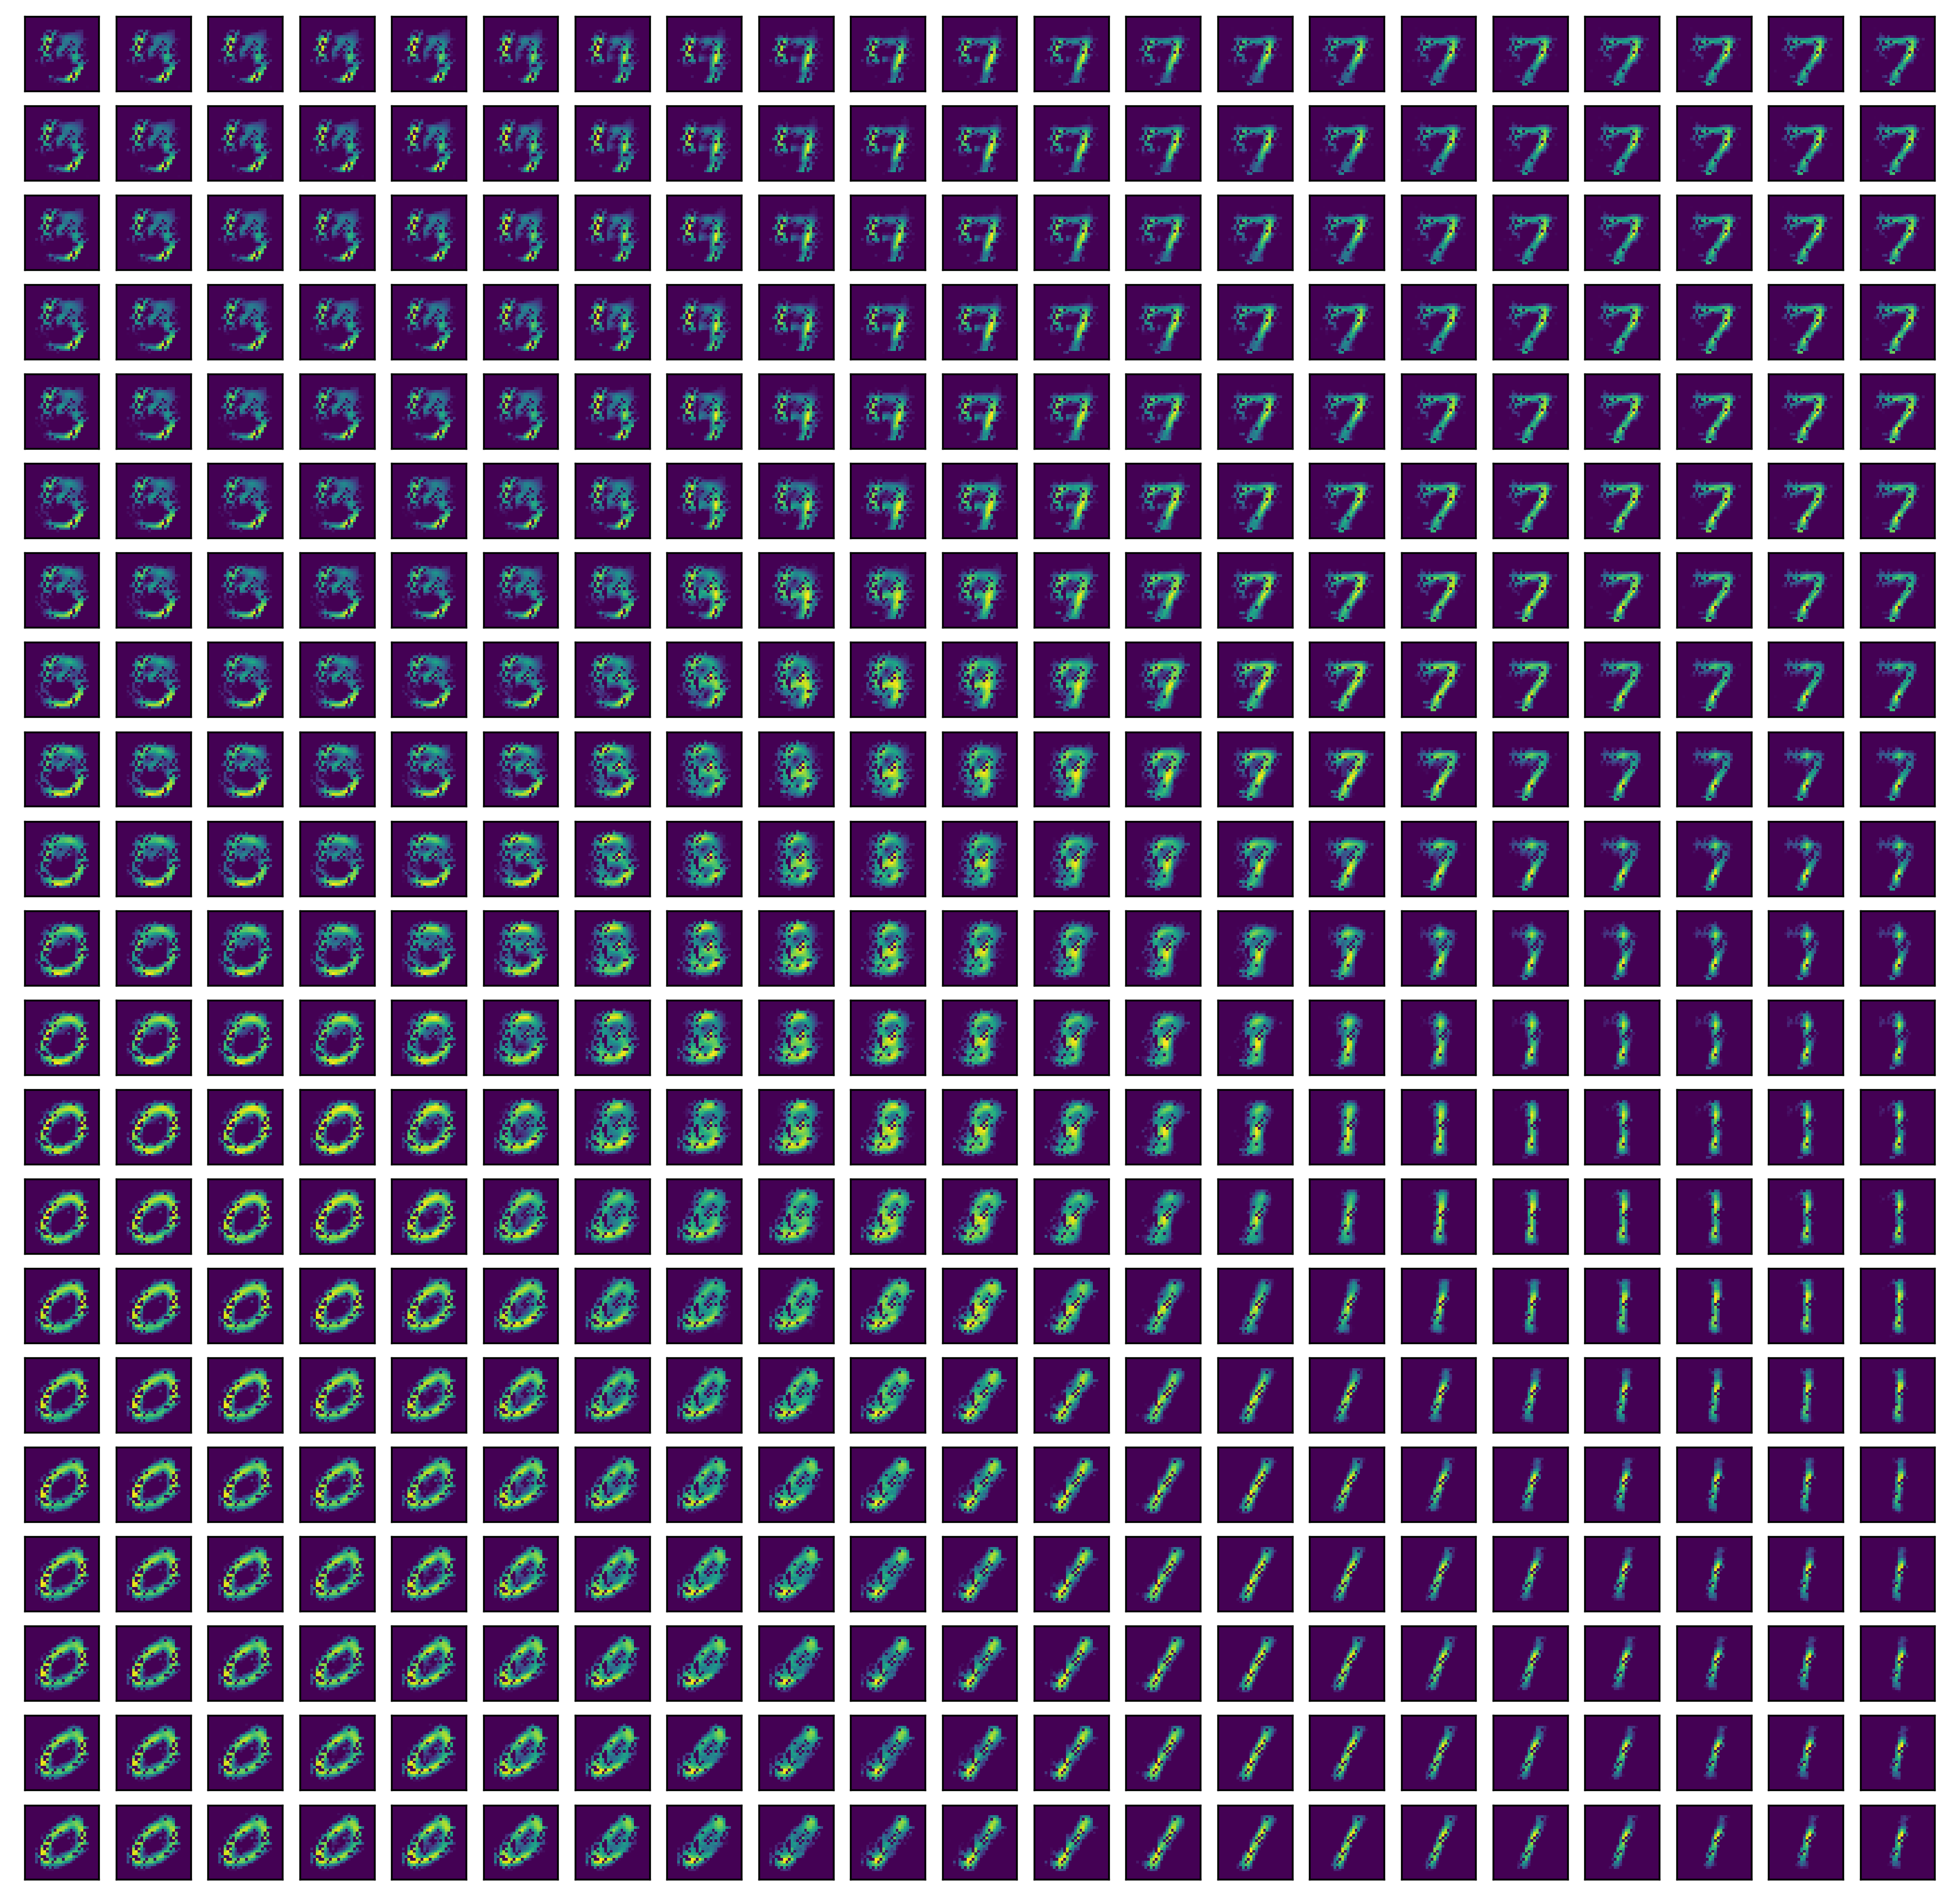

In [51]:
Nplot = 21
plt.figure(figsize=(15,15))
idx = 0
for ix in np.linspace(-9, 9, Nplot):
    for iy in np.linspace(-9, 9, Nplot):
        idx += 1
        plt.subplot(Nplot, Nplot, idx)
        fake_encoding = np.expand_dims(np.array([ix, iy]), 0)
        fake_digit = decoder(fake_encoding).numpy().squeeze() 
        plt.imshow(fake_digit);
        plt.xticks([], [])
        plt.yticks([], [])

## Autoencoders (unsupervised training)

Go to https://github.com/kartikgill/Autoencoders/blob/main/Variational%20Autoencoder.ipynb

Go to `003c_random_face_generator.ipynb` notebook.

## Autoencoder to anomaly detect

https://keras.io/examples/timeseries/timeseries_anomaly_detection/